In [1]:
import os
os.chdir('../')
# This should be the project root folder
os.getcwd()

'/home/pex/Documents/unitn/TODO/Applied_ML/lab/project'

In [2]:
import tensorflow as tf

from adda.models import Phase1Model
from adda.data import Dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from adda.settings import config as cfg

2021-12-11 22:21:33.684054: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-11 22:21:33.684081: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Load the dataset into the data object
dataset = Dataset('USPS', 'training', sample=True, sample_size=75, batch_size=32)

In [4]:
len(dataset.data)
# len(dataset.labels)

75

In [5]:
data_b, labels_b = dataset.get_batch()

In [6]:
len(data_b)

32

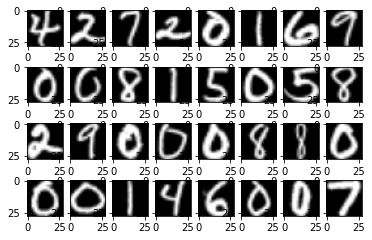

In [7]:
fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [8]:
labels_b

array([4, 2, 7, 2, 0, 1, 6, 9, 0, 0, 8, 1, 5, 0, 5, 8, 2, 9, 0, 0, 0, 8,
       8, 0, 0, 0, 1, 4, 6, 0, 0, 7])

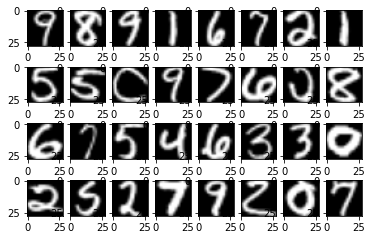

In [9]:
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [10]:
labels_b

array([9, 8, 9, 1, 6, 7, 2, 1, 5, 5, 0, 9, 7, 6, 0, 8, 6, 7, 5, 4, 6, 3,
       3, 0, 2, 5, 2, 7, 9, 2, 0, 7])

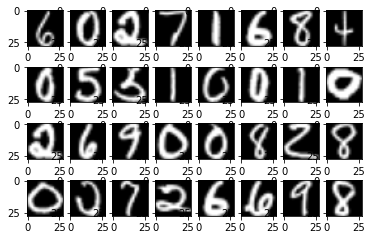

In [11]:
# This batch (the last available) is going to be padded.
# We're asking a batch of size 32, but we have only 75 - 64 = 9 residual data points.
# 32 - 9 = 23 data points will be randomly sampled from the 75 available data points.
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [12]:
labels_b

array([6, 0, 2, 7, 1, 6, 8, 4, 0, 5, 5, 1, 0, 0, 1, 0, 2, 6, 9, 0, 0, 8,
       2, 8, 0, 0, 7, 2, 6, 6, 9, 8])

In [16]:
# The invoketion returns None, None, due to the end of available batches
data_b, labels_b = dataset.get_batch()

In [18]:
# Let's rewind the interator
dataset.reset_pos()

In [20]:
# Shuffle the data
dataset.shuffle()

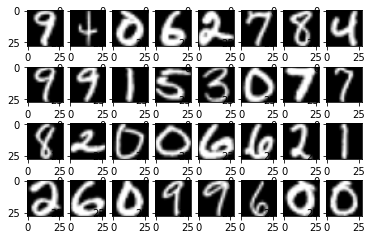

In [21]:
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [22]:
labels_b

array([9, 4, 0, 6, 2, 7, 8, 4, 9, 9, 1, 5, 3, 0, 7, 7, 8, 2, 0, 0, 6, 6,
       2, 1, 2, 6, 0, 9, 9, 6, 0, 0])

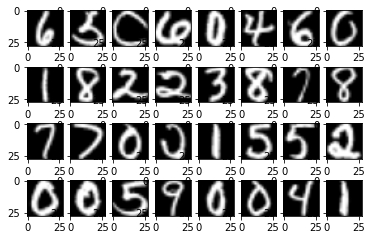

In [23]:
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [24]:
labels_b

array([6, 5, 0, 6, 0, 4, 6, 0, 1, 8, 2, 2, 3, 8, 7, 8, 7, 7, 0, 0, 1, 5,
       5, 2, 0, 0, 5, 9, 0, 0, 4, 1])

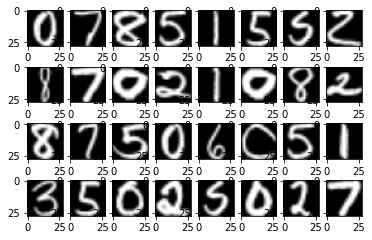

In [25]:
# This batch (the last available) is going to be padded.
# We're asking a batch of size 32, but we have only 75 - 64 = 9 residual data points.
# 32 - 9 = 23 data points will be randomly sampled from the 75 available data points.
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [26]:
labels_b

array([0, 7, 8, 5, 1, 5, 5, 2, 8, 7, 0, 2, 1, 0, 8, 2, 8, 7, 5, 0, 6, 0,
       5, 1, 3, 5, 0, 2, 5, 0, 2, 7])

In [27]:
# Load the trained and saved model
model = tf.keras.models.load_model(cfg.PHASE1_MODEL_PATH, compile=False)
model.summary()

2021-12-11 22:31:21.537290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-11 22:31:21.537344: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-11 22:31:21.537379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PexNotebook): /proc/driver/nvidia/version does not exist


Model: "phase1_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
le_net_encoder (LeNetEncoder multiple                  25570     
_________________________________________________________________
le_net_classifier (LeNetClas multiple                  405510    
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
_________________________________________________________________


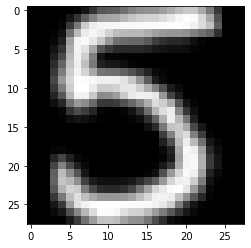

In [28]:
# Select an image to be classified by the model
img = data_b[3]
plottable_image = np.reshape(img, (28, 28))
plt.gray()
plt.imshow(plottable_image)
plt.show()

In [30]:
# Verify the label associated to the training datapoint
label = labels_b[3]
label

5

In [31]:
# Expand dimensions to [1, 28, 28, 1]
img = np.reshape(img, (1, 28, 28, 1))
np.shape(img)

(1, 28, 28, 1)

In [32]:
# Replicate the image expanding the dimensions to [2, 28, 28, 1]
# Why? Because TensorFlow doesn't like a single input; so a replication is needed.
img = np.tile(img, [2, 1, 1, 1])
np.shape(img)

(2, 28, 28, 1)

In [33]:
# Let's make a class prediction for the selected image
logits, preds = model(img, training=False)

# Extract the maximun value of the class probabilities
prediction = tf.argmax(preds, -1)
print('Class: {}'.format(prediction[0]))
print('Predictions: {}'.format(preds[0]))

# We generated a feature map of a USPS data point using the CNN encoder trained with the MNIST dataset.
# Obviously it is wrongly classified.

Class: 7
Predictions: [0.06677575 0.12032783 0.15111889 0.1030889  0.06191795 0.14591123
 0.07686178 0.166843   0.03878113 0.06837366]


2021-12-11 22:32:08.648428: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-11 22:32:08.671195: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2691275000 Hz
